# Analyzing Austin PD's Crime Reports Dataset

The dataset is available from the Austin Police Department on https://data.austintexas.gov/Public-Safety/Crime-Reports/fdj4-gpfu. It is updated weekly and I last downloaded the dataset on 8/10/2020.  



## Table of Contents 

    I. Introduction
    II. Data Scrubbing
    III. Exploratory Analysis and Visualizations 
    IV. Data Modeling
    
    Questions:
><ul>
><li><a href="#q1"> 1. What areas of Austin have the highest crime rates?</a></li>
><li><a href="#q2"> 2. How is crime distributed in 78753?</a></li> 
><li><a href="#q3"> 3. How is crime distributed in 78741?</a></li>
><li><a href="#q4"> 4. How are violent crimes, in particular murder and rape, distributed?</a></li>

## I. Introduction

I began reviewing the Crime Reports dataset, provided by the Austin PD, around the same time I began reviewing its Hate Crimes datasets for analysis, at the beginning of 2020. This is a rather large dataset, containing over 2 million records, spanning from 2003 to the present, and is update weekly. 

This is a self-paced project, conceived outside of both work and the educational arenas. It is my hope that this project will reveal some actionable insights that will benefit the Austin law enforcement community, news outlets, and anyone else interested in gaining knowledge on how best to combat the problem of crime in the Austin area.

I originally attempted importing the data into this notebook using Sodapy's Socrata API method but found it cumbersome. Mainly, it didn't want to work with importing the entire dataset, and added several redundant columns. I, therefore, prefer to manually download the entire dataset and re-download each week after it's updated.

In [ ]:
# Importing libraries and configurations
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [1]:
pd.set_option('display.max_columns', None)

# Loading the data
df = pd.read_csv('crime_reports.csv')

# Examining the dataframe
display(df.head())
print('----------------------------------')
display(df.tail())
print('----------------------------------')
display(df.info())
print('----------------------------------')
display(df.duplicated().sum())
print('----------------------------------')
display(df.isnull().sum())

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
0,20125003262,PROTECTIVE ORDER,3829,N,01/23/2012 05:17:00 AM,01/23/2012,517.0,01/23/2012 05:17:00 AM,01/23/2012,517.0,RESIDENCE / HOME,UNKNOWN,NaN,NaN,DA,1,491,NaN,N,01/23/2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20072832112,ASSAULT WITH INJURY,900,N,10/10/2007 09:00:00 PM,10/10/2007,2100.0,10/10/2007 10:00:00 PM,10/10/2007,2200.0,BAR / NIGHT CLUB,HOT BODIES CLUB HWY 71 & BURLESON RD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20081232700,FAMILY DISTURBANCE,3400,N,05/02/2008 11:11:00 PM,05/02/2008,2311.0,05/02/2008 11:11:00 PM,05/02/2008,2311.0,RESIDENCE / HOME,9702 CHILSOM TRAIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2006900236,ASSAULT WITH INJURY,900,N,03/31/2006 02:50:00 AM,03/31/2006,250.0,03/31/2006 02:50:00 AM,03/31/2006,250.0,RESIDENCE / HOME,721 LAMAR PLACE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20081002040,CRASH/FAIL STOP AND RENDER AID,3604,N,04/09/2008 07:04:00 PM,04/09/2008,1904.0,04/09/2008 09:08:00 PM,04/09/2008,2108.0,STREETS / HWY / ROAD / ALLEY,2500 BLOCK OF GUADALUPE,NaN,NaN,NaN,NaN,NaN,NaN,N,12/16/2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN


----------------------------------


,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
2257623,20175007735,HARASSMENT,2703,N,01/31/2017 10:31:00 AM,01/31/2017,1031.0,02/23/2017 10:31:00 AM,02/23/2017,1031.0,RESIDENCE / HOME,9802 ROXANNA DR,78748.0,5.0,FR,1,535,17.47,N,03/16/2017,NaN,NaN,3088221.0,3088221.0,30.176236,-97.827862,"(30.17623555, -97.82786218)"
2257624,20108800371,CRIMINAL TRESPASS/TRANSIENT,2721,N,03/29/2010 07:17:00 AM,03/29/2010,717.0,03/29/2010 07:17:00 AM,03/29/2010,717.0,CHURCH / SYNAGOGUE / TEMPLE / MOSQUE,203 E 10TH ST,78701.0,9.0,GE,1,379,11.00,N,03/30/2010,NaN,NaN,3115283.0,3115283.0,30.271040,-97.739653,"(30.27103998, -97.73965326)"
2257625,2003924076801,BURGLARY OF RESIDENCE,500,N,01/04/2003 06:30:00 PM,01/04/2003,1830.0,01/05/2003 10:31:00 AM,01/05/2003,1031.0,RESIDENCE / HOME,1809 SANCHEZ ST,78702.0,1.0,CH,3,394,8.00,N,NaN,220,Burglary,3125587.0,3125587.0,30.281489,-97.706719,"(30.28148881, -97.70671938)"
2257626,2006902409,BURGLARY NON RESIDENCE,502,N,03/31/2006 10:46:00 PM,03/31/2006,2246.0,03/31/2006 10:46:00 PM,03/31/2006,2246.0,COMMERCIAL / OFFICE BUILDING,6016 OLD FREDERICKSBURG RD,78749.0,8.0,DA,6,78,NaN,NaN,05/10/2006,220,Burglary,3081299.0,3081299.0,30.234197,-97.848283,"(30.2341966, -97.8482829)"
2257627,2010232299,FAMILY DISTURBANCE,3400,N,01/23/2010 10:44:00 PM,01/23/2010,2244.0,01/24/2010 12:14:00 AM,01/24/2010,14.0,RESIDENCE / HOME,9307 GEORGIAN DR,78753.0,4.0,ED,1,250,18.00,N,02/06/2010,NaN,NaN,3129098.0,3129098.0,30.360317,-97.693437,"(30.36031662, -97.69343723)"


----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2257628 entries, 0 to 2257627
Data columns (total 27 columns):
Incident Number                int64
Highest Offense Description    object
Highest Offense Code           int64
Family Violence                object
Occurred Date Time             object
Occurred Date                  object
Occurred Time                  float64
Report Date Time               object
Report Date                    object
Report Time                    float64
Location Type                  object
Address                        object
Zip Code                       float64
Council District               float64
APD Sector                     object
APD District                   object
PRA                            object
Census Tract                   float64
Clearance Status               object
Clearance Date                 object
UCR Category                   object
Category Description           object
X-coordinate 

None

----------------------------------


0

----------------------------------


Incident Number                      0
Highest Offense Description          0
Highest Offense Code                 0
Family Violence                      0
Occurred Date Time                 165
Occurred Date                        0
Occurred Time                       84
Report Date Time                     1
Report Date                          0
Report Time                          1
Location Type                    20854
Address                             12
Zip Code                         13718
Council District                 46757
APD Sector                        8710
APD District                      9178
PRA                              10399
Census Tract                   1336680
Clearance Status                601798
Clearance Date                  332585
UCR Category                   1491144
Category Description           1491144
X-coordinate                      9814
Y-coordinate                      9814
Latitude                         38034
Longitude                

## II. Data Scrubbing

There are several columns of data we won't be using in the analysis, mainly other date and geodata columns. So we'll drop those and also scrub some others. Mainly, we want the zip code and address columns to be free of nulls and duplicates. 

In [2]:
# Setting 'Report Date Time' as the index after converting it to datetime64 format
df.dropna(subset=['Report Date Time'], inplace=True) 
df.rename(columns = {'Report Date Time':'report_date_time'}, inplace=True)
df.report_date_time = df.report_date_time.astype('datetime64')
df.set_index(['report_date_time'], inplace=True)
df.sort_index(inplace=True)

# Cleaning essential columns and converting them to the appropriate data type
df.dropna(subset=['Address'], inplace=True)
df.dropna(subset=['Zip Code'], inplace=True)
df['Occurred Date'] = df['Occurred Date'].astype('datetime64')
df['Clearance Date'] = df['Clearance Date'].astype('datetime64')

# Dropping unnecessary columns 
df.drop(['Incident Number', 'Occurred Date Time', 'Occurred Time', 'Report Date', 'Report Time', 'Census Tract', 
         'UCR Category', 'Category Description', 'X-coordinate', 'Y-coordinate', 'Location'], axis=1, inplace=True)

# Making the column names easier for analysis and coding
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)


# Showing the index 
display(df.index)

# Rechecking null values
print('----------------------------------')
display(df.columns)
print('----------------------------------')
display(df.isnull().sum())

DatetimeIndex(['2002-11-29 05:30:00', '2003-01-01 00:01:00',
               '2003-01-01 00:02:00', '2003-01-01 00:03:00',
               '2003-01-01 00:06:00', '2003-01-01 00:08:00',
               '2003-01-01 00:10:00', '2003-01-01 00:11:00',
               '2003-01-01 00:11:00', '2003-01-01 00:12:00',
               ...
               '2020-08-08 19:36:00', '2020-08-08 19:51:00',
               '2020-08-08 20:13:00', '2020-08-08 20:30:00',
               '2020-08-08 20:31:00', '2020-08-08 20:35:00',
               '2020-08-08 21:00:00', '2020-08-08 21:11:00',
               '2020-08-08 21:27:00', '2020-08-08 21:40:00'],
              dtype='datetime64[ns]', name='report_date_time', length=2243909, freq=None)

----------------------------------


Index(['highest_offense_description', 'highest_offense_code',
       'family_violence', 'occurred_date', 'location_type', 'address',
       'zip_code', 'council_district', 'apd_sector', 'apd_district', 'pra',
       'clearance_status', 'clearance_date', 'latitude', 'longitude'],
      dtype='object')

----------------------------------


highest_offense_description         0
highest_offense_code                0
family_violence                     0
occurred_date                       0
location_type                   20459
address                             0
zip_code                            0
council_district                33039
apd_sector                          8
apd_district                       11
pra                                11
clearance_status               597384
clearance_date                 329443
latitude                        27475
longitude                       27475
dtype: int64

In [3]:
# rechecking/removing duplicates
display(df.duplicated().sum())

17673

In [4]:
df.drop_duplicates(inplace=True)
display(df.duplicated().sum())

0

## III. Exploratory Analysis

In [5]:
# Reexamining the dataframe 
display(df.shape)
print('----------------------------------')
display(df.head())
print('----------------------------------')
display(df.tail())

(2226236, 15)

----------------------------------


,highest_offense_description,highest_offense_code,family_violence,occurred_date,location_type,address,zip_code,council_district,apd_sector,apd_district,pra,clearance_status,clearance_date,latitude,longitude
report_date_time,,,,,,,,,,,,,,,
2002-11-29 05:30:00,FAMILY DISTURBANCE,3400,N,2003-01-29,RESIDENCE / HOME,6263 MC NEIL DR,78727.0,6.0,AD,3,183,N,NaT,30.441398,-97.747483
2003-01-01 00:01:00,DEADLY CONDUCT,408,N,2003-01-01,RESIDENCE / HOME,6400 CHIMNEY CREEK CIR,78723.0,1.0,ID,4,297,N,NaT,30.312100,-97.678260
2003-01-01 00:02:00,BURGLARY NON RESIDENCE,502,N,2003-01-01,COMMERCIAL / OFFICE BUILDING,730 W STASSNEY LN,78745.0,2.0,DA,3,511,NaN,2003-10-18,30.209853,-97.782088
2003-01-01 00:03:00,DEADLY CONDUCT,408,N,2003-01-01,RESIDENCE / HOME,1521 REAGAN HILL DR,78752.0,4.0,ID,2,266,C,2003-01-02,30.325735,-97.689095
2003-01-01 00:06:00,RESISTING ARREST OR SEARCH,905,N,2003-01-01,RESIDENCE / HOME,2407 CORONADO ST,78702.0,3.0,CH,2,422,C,2003-01-01,30.261713,-97.713550


----------------------------------


,highest_offense_description,highest_offense_code,family_violence,occurred_date,location_type,address,zip_code,council_district,apd_sector,apd_district,pra,clearance_status,clearance_date,latitude,longitude
report_date_time,,,,,,,,,,,,,,,
2020-08-08 20:35:00,THEFT,600,N,2020-08-07,RESIDENCE / HOME,1405 CLEARFIELD DR,78758.0,4.0,ED,2,249,NaN,NaT,30.357397,-97.714585
2020-08-08 21:00:00,BURGLARY OF VEHICLE,601,N,2020-08-08,PARKING LOTS / GARAGE,3800 MOUNT BONNELL RD,78731.0,10.0,BA,7,314,NaN,NaT,30.321048,-97.773540
2020-08-08 21:11:00,CRIMINAL MISCHIEF,1400,N,2020-08-08,RESIDENCE / HOME,9004 GEORGIAN DR,78753.0,4.0,ED,1,250,NaN,NaT,30.357522,-97.695563
2020-08-08 21:27:00,INDECENT EXPOSURE,1706,N,2020-08-08,PARKING LOTS / GARAGE,4405 PACK SADDLE PASS,78745.0,5.0,DA,4,488,NaN,NaT,30.230618,-97.792042
2020-08-08 21:40:00,BURGLARY OF VEHICLE,601,N,2020-08-08,RESIDENCE / HOME,1930 W RUNDBERG LN,78758.0,4.0,ED,2,236,NaN,NaT,30.373060,-97.717389


***Note: I am only including zipcodes and crimes, for questions 1 - 3, that >= 1%. Any zipcodes or crime percentages, below 1%, will be discluded to simplify analysis and visualizations.***

<a id='q1'></a>
### A. Question 1. What areas of Austin have the highest crime rates? 

78741.0    202174
78753.0    173172
78701.0    164322
78758.0    154871
78704.0    150133
78745.0    147471
78702.0    134265
78744.0    123371
78723.0    115706
78752.0     82463
78748.0     66251
78759.0     64357
78751.0     60098
78757.0     56356
78705.0     55678
78721.0     46787
78749.0     39513
78724.0     36868
78727.0     34936
78703.0     34395
78731.0     27777
78746.0     27062
78729.0     24902
78750.0     22986
Name: zip_code, dtype: int64

----------------------------------


78741.0    0.090814
78753.0    0.077787
78701.0    0.073812
78758.0    0.069566
78704.0    0.067438
78745.0    0.066242
78702.0    0.060310
78744.0    0.055417
78723.0    0.051974
78752.0    0.037041
78748.0    0.029759
78759.0    0.028908
78751.0    0.026995
78757.0    0.025314
78705.0    0.025010
78721.0    0.021016
78749.0    0.017749
78724.0    0.016561
78727.0    0.015693
78703.0    0.015450
78731.0    0.012477
78746.0    0.012156
78729.0    0.011186
78750.0    0.010325
Name: zip_code, dtype: float64

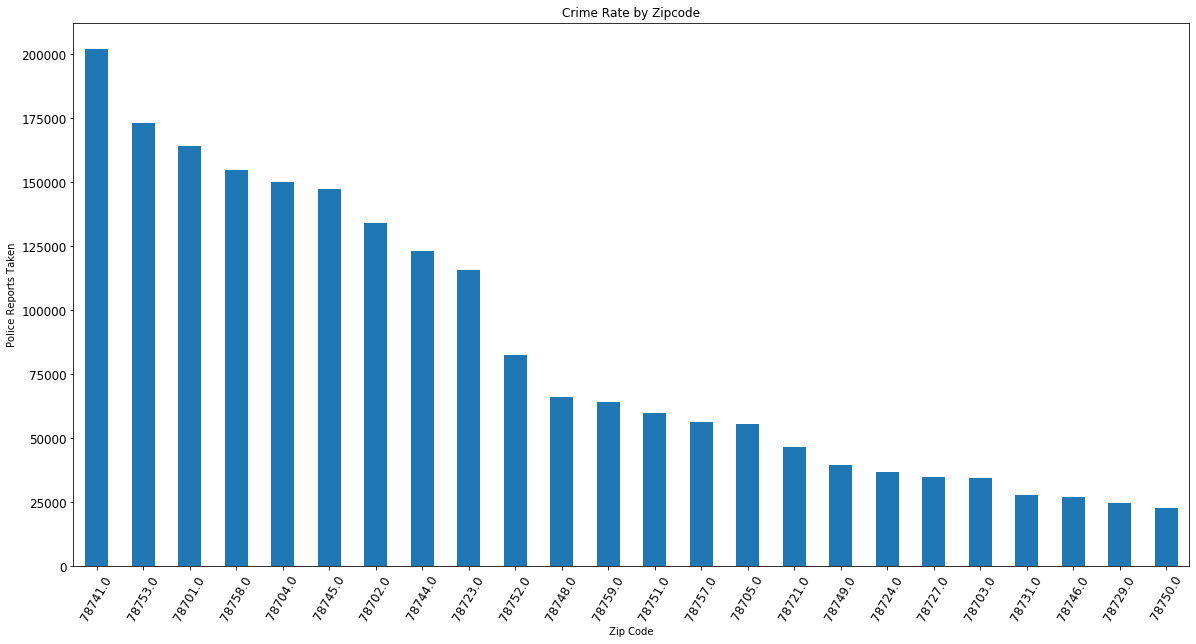

In [6]:
# Create and show dataframe for crime rates by zipcode
zip_codes = df.zip_code.value_counts().head(24)
display(zip_codes)

# Showing the results as percentages
print('----------------------------------')
display(df.zip_code.value_counts(normalize=True).head(24))

zip_codes.plot.bar(figsize=(20,10), fontsize=12, rot=60)

plt.xlabel('Zip Code')
plt.ylabel('Police Reports Taken')
plt.title('Crime Rate by Zipcode')
plt.savefig('crime_rates.png')

Out of all the areas in Austin, 78741 has the highest percentage of overall crime at 9.08%. This is a significant 1.3 percentage points higher than the number 2 area 78753 which hosts 7.78% of overall crime.

#### Taking a closer look at particular areas... 

Because 78753 is my resident zipcode, I chose to examine it first. 

Next, I'll examine 78741. 

<a id='q2'></a>
### B. Question 2. How is crime distributed in 78753? 

THEFT                             16703
BURGLARY OF VEHICLE               15338
FAMILY DISTURBANCE                14202
CRIMINAL MISCHIEF                  9168
THEFT BY SHOPLIFTING               7184
ASSAULT W/INJURY-FAM/DATE VIOL     6995
BURGLARY OF RESIDENCE              5943
DWI                                4824
DISTURBANCE - OTHER                4655
CUSTODY ARREST TRAFFIC WARR        4308
HARASSMENT                         4132
AUTO THEFT                         4023
POSS OF DRUG PARAPHERNALIA         3700
PUBLIC INTOXICATION                3336
ASSAULT WITH INJURY                3215
CRIMINAL TRESPASS                  3073
RUNAWAY CHILD                      2877
POSS CONTROLLED SUB/NARCOTIC       2803
WARRANT ARREST NON TRAFFIC         2775
POSSESSION OF MARIJUANA            2672
BURGLARY NON RESIDENCE             2408
VIOL CITY ORDINANCE - OTHER        1830
Name: highest_offense_description, dtype: int64

----------------------------------


THEFT                             0.096453
BURGLARY OF VEHICLE               0.088571
FAMILY DISTURBANCE                0.082011
CRIMINAL MISCHIEF                 0.052942
THEFT BY SHOPLIFTING              0.041485
ASSAULT W/INJURY-FAM/DATE VIOL    0.040393
BURGLARY OF RESIDENCE             0.034318
DWI                               0.027857
DISTURBANCE - OTHER               0.026881
CUSTODY ARREST TRAFFIC WARR       0.024877
HARASSMENT                        0.023861
AUTO THEFT                        0.023231
POSS OF DRUG PARAPHERNALIA        0.021366
PUBLIC INTOXICATION               0.019264
ASSAULT WITH INJURY               0.018565
CRIMINAL TRESPASS                 0.017745
RUNAWAY CHILD                     0.016614
POSS CONTROLLED SUB/NARCOTIC      0.016186
WARRANT ARREST NON TRAFFIC        0.016025
POSSESSION OF MARIJUANA           0.015430
BURGLARY NON RESIDENCE            0.013905
VIOL CITY ORDINANCE - OTHER       0.010568
Name: highest_offense_description, dtype: float64

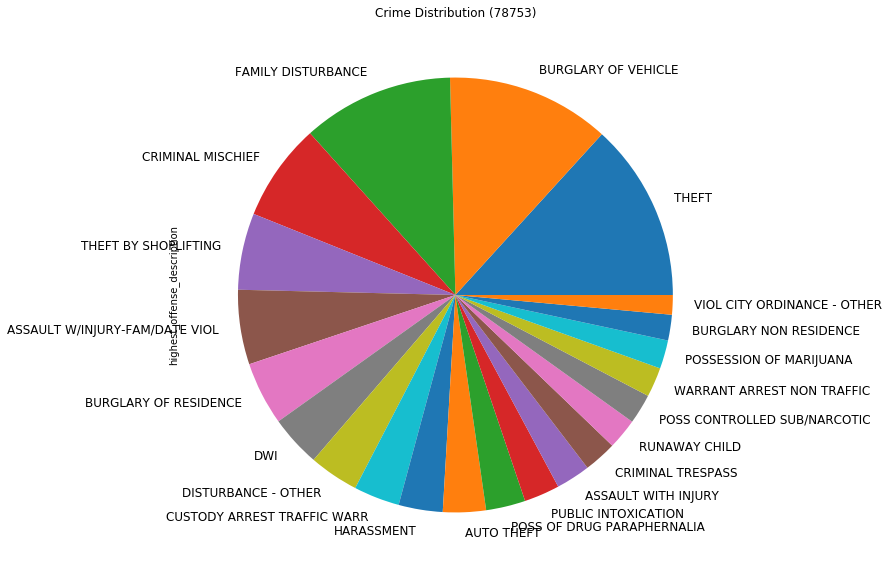

In [7]:
# Examining crime in the 78753 area
df_53 = df[df.zip_code == 78753]

# Create a dataframe for the top 10 crime categories in the zipcode
df_53_off = df_53.highest_offense_description.value_counts().head(22)

# Display the different crime values & then as percentages 
display(df_53_off)
print('----------------------------------')
display(df_53.highest_offense_description.value_counts(normalize=True).head(22))

df_53_off.plot.pie(figsize=(10,10), fontsize=12, rot=60)
plt.title('Crime Distribution (78753)')
plt.savefig('crime_distribution_78753.png')

<a id='q3'></a>
### C. Question 3. How is crime distributed in 78741? 

FAMILY DISTURBANCE                19828
BURGLARY OF VEHICLE               19181
THEFT                             15279
CRIMINAL MISCHIEF                 10815
ASSAULT W/INJURY-FAM/DATE VIOL     9508
BURGLARY OF RESIDENCE              8714
PUBLIC INTOXICATION                6348
CUSTODY ARREST TRAFFIC WARR        5992
DWI                                5593
HARASSMENT                         5396
DISTURBANCE - OTHER                5071
ASSAULT WITH INJURY                4455
AUTO THEFT                         4455
POSS CONTROLLED SUB/NARCOTIC       3797
CRIMINAL TRESPASS                  3792
POSSESSION OF MARIJUANA            3776
POSS OF DRUG PARAPHERNALIA         3510
WARRANT ARREST NON TRAFFIC         3444
THEFT BY SHOPLIFTING               3377
RUNAWAY CHILD                      2755
VIOL CITY ORDINANCE - OTHER        2145
Name: highest_offense_description, dtype: int64

----------------------------------


FAMILY DISTURBANCE                0.098074
BURGLARY OF VEHICLE               0.094874
THEFT                             0.075574
CRIMINAL MISCHIEF                 0.053494
ASSAULT W/INJURY-FAM/DATE VIOL    0.047029
BURGLARY OF RESIDENCE             0.043101
PUBLIC INTOXICATION               0.031399
CUSTODY ARREST TRAFFIC WARR       0.029638
DWI                               0.027664
HARASSMENT                        0.026690
DISTURBANCE - OTHER               0.025082
ASSAULT WITH INJURY               0.022035
AUTO THEFT                        0.022035
POSS CONTROLLED SUB/NARCOTIC      0.018781
CRIMINAL TRESPASS                 0.018756
POSSESSION OF MARIJUANA           0.018677
POSS OF DRUG PARAPHERNALIA        0.017361
WARRANT ARREST NON TRAFFIC        0.017035
THEFT BY SHOPLIFTING              0.016703
RUNAWAY CHILD                     0.013627
VIOL CITY ORDINANCE - OTHER       0.010610
Name: highest_offense_description, dtype: float64

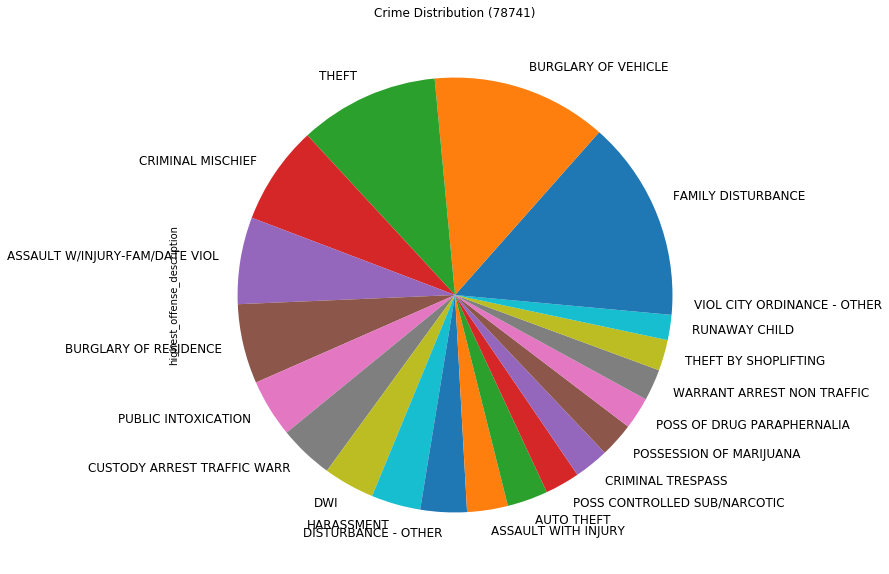

In [8]:
# Create a dataframe for crime in the 78741 area (the highest amount of crime of any Austin zip code)
df_41 = df[df.zip_code == 78741]

# Create a dataframe for the top 10 crime categories in the zipcode
df_41_off = df_41.highest_offense_description.value_counts().head(21)

# Display the different crime values & then as percentages 
display(df_41_off)
print('----------------------------------')
display(df_41.highest_offense_description.value_counts(normalize=True).head(21))

df_41_off.plot.pie(figsize=(10,10), fontsize=12)
plt.title('Crime Distribution (78741)')
plt.savefig('crime_distribution_78741.png')

<a id='q4'></a>
### D. Question 4. How are violent crimes, in particular murder, capital murder, and rape, distributed? 

***Note: Only including areas where rape crimes >= 1%.***

----------------------------------
Murder
----------------------------------


78741.0    42
78753.0    40
78758.0    36
78723.0    33
78744.0    27
78702.0    24
78752.0    21
78745.0    20
78701.0    16
78704.0    16
78721.0    13
78724.0    12
78749.0    10
78751.0     8
78757.0     6
78759.0     6
78617.0     6
78705.0     6
78754.0     5
78727.0     5
78731.0     4
78748.0     4
78747.0     4
78750.0     4
78735.0     3
78742.0     2
78746.0     2
78660.0     2
78729.0     2
78756.0     2
78728.0     1
78653.0     1
78613.0     1
78717.0     1
Name: zip_code, dtype: int64

----------------------------------


78741.0    0.109091
78753.0    0.103896
78758.0    0.093506
78723.0    0.085714
78744.0    0.070130
78702.0    0.062338
78752.0    0.054545
78745.0    0.051948
78701.0    0.041558
78704.0    0.041558
78721.0    0.033766
78724.0    0.031169
78749.0    0.025974
78751.0    0.020779
78757.0    0.015584
78759.0    0.015584
78617.0    0.015584
78705.0    0.015584
78754.0    0.012987
78727.0    0.012987
78731.0    0.010390
78748.0    0.010390
78747.0    0.010390
78750.0    0.010390
78735.0    0.007792
78742.0    0.005195
78746.0    0.005195
78660.0    0.005195
78729.0    0.005195
78756.0    0.005195
78728.0    0.002597
78653.0    0.002597
78613.0    0.002597
78717.0    0.002597
Name: zip_code, dtype: float64

----------------------------------
Capital Murder
----------------------------------


78723.0    11
78753.0    11
78758.0     8
78741.0     7
78745.0     6
78752.0     6
78744.0     4
78748.0     3
78721.0     3
78702.0     3
78704.0     2
78757.0     2
78705.0     2
78727.0     2
78724.0     2
78722.0     1
78703.0     1
78759.0     1
78749.0     1
78731.0     1
78701.0     1
78754.0     1
Name: zip_code, dtype: int64

----------------------------------


78723.0    0.139241
78753.0    0.139241
78758.0    0.101266
78741.0    0.088608
78745.0    0.075949
78752.0    0.075949
78744.0    0.050633
78748.0    0.037975
78721.0    0.037975
78702.0    0.037975
78704.0    0.025316
78757.0    0.025316
78705.0    0.025316
78727.0    0.025316
78724.0    0.025316
78722.0    0.012658
78703.0    0.012658
78759.0    0.012658
78749.0    0.012658
78731.0    0.012658
78701.0    0.012658
78754.0    0.012658
Name: zip_code, dtype: float64

----------------------------------
Rape
----------------------------------


78741.0    498
78753.0    356
78701.0    351
78758.0    310
78745.0    273
78704.0    240
78705.0    205
78744.0    203
78723.0    196
78702.0    181
78752.0    140
78748.0    112
78751.0    110
78759.0    103
78757.0     81
78721.0     73
78724.0     65
78729.0     55
78749.0     53
78731.0     52
78754.0     47
Name: zip_code, dtype: int64

----------------------------------


78741.0    0.121050
78753.0    0.086534
78701.0    0.085318
78758.0    0.075352
78745.0    0.066359
78704.0    0.058337
78705.0    0.049830
78744.0    0.049344
78723.0    0.047642
78702.0    0.043996
78752.0    0.034030
78748.0    0.027224
78751.0    0.026738
78759.0    0.025036
78757.0    0.019689
78721.0    0.017744
78724.0    0.015800
78729.0    0.013369
78749.0    0.012883
78731.0    0.012640
78754.0    0.011424
Name: zip_code, dtype: float64

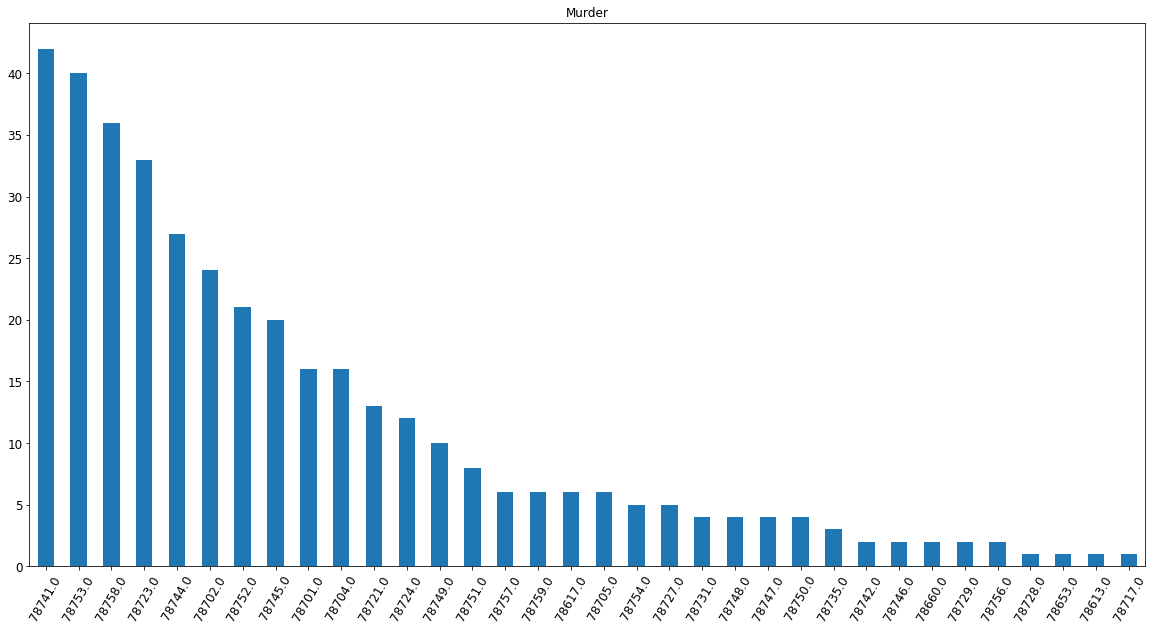

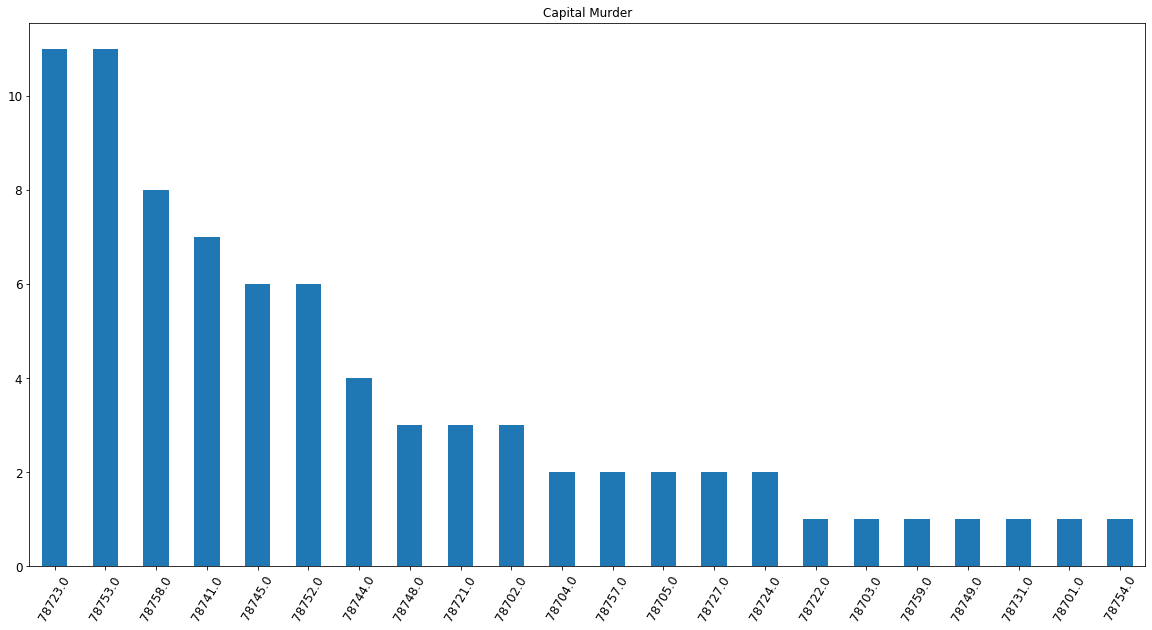

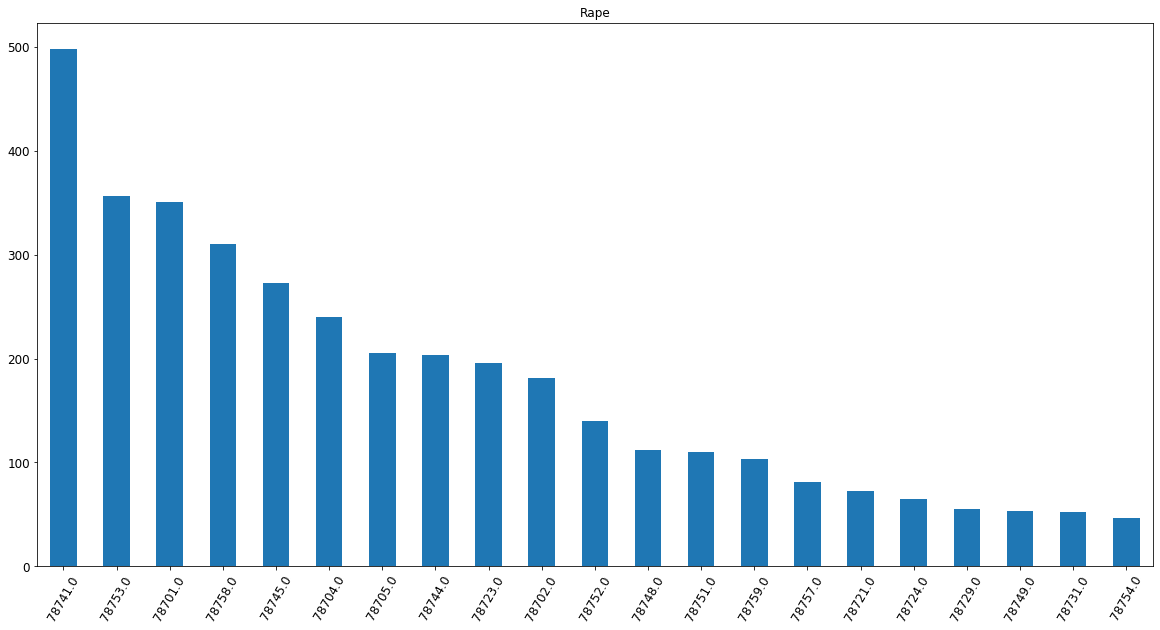

------------------------------------------------------------------------------------------
Plotting Murder and Capital Murder in Seaborn Jointplots using Latitude and Longitude Data
------------------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

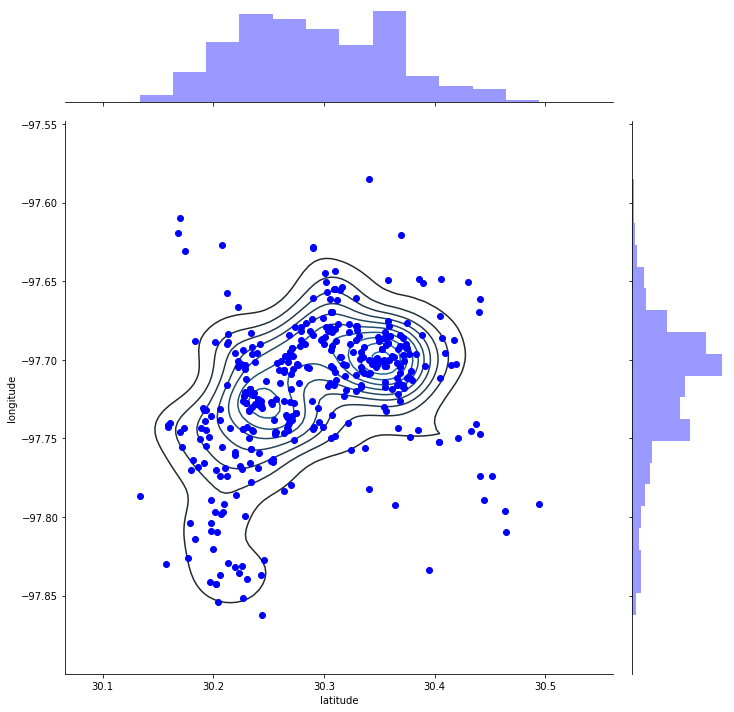

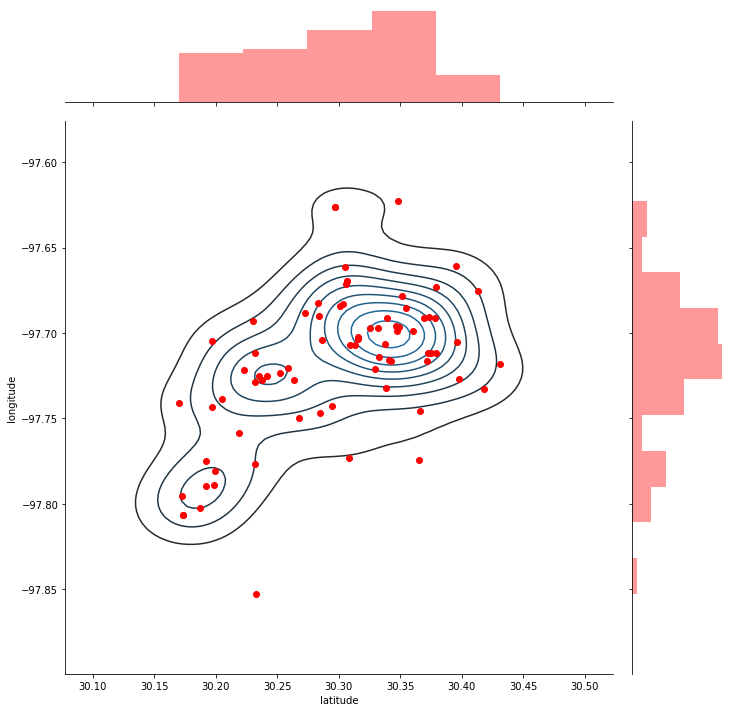

In [9]:
# Create a dataframe for murders, capital murders, and rapes
df_mur = df[df.highest_offense_description == 'MURDER']
df_mur_cap = df[df.highest_offense_description == 'CAPITAL MURDER']
df_rape = df[df.highest_offense_description == 'RAPE']

# What are the top zipcodes for murders? 
print('----------------------------------')
print('Murder')
print('----------------------------------')
df_mur_val = df_mur.zip_code.value_counts()
display(df_mur_val)
print('----------------------------------')
display(df_mur.zip_code.value_counts(normalize=True))

# What are the top zipcodes for capital murders? 
print('----------------------------------')
print('Capital Murder')
print('----------------------------------')
df_mur_cap_val = df_mur_cap.zip_code.value_counts()
display(df_mur_cap_val)
print('----------------------------------')
display(df_mur_cap.zip_code.value_counts(normalize=True))

# What are the top 10 zipcodes for rape? 
print('----------------------------------')
print('Rape')
print('----------------------------------')
df_rape_val = df_rape.zip_code.value_counts().head(21)
display(df_rape_val)
print('----------------------------------')
display(df_rape.zip_code.value_counts(normalize=True).head(21))

df_mur_val.plot.bar(figsize=(20,10), rot=60, fontsize=12)
plt.title('Murder')
plt.show()
plt.savefig('murder.png')

df_mur_cap_val.plot.bar(figsize=(20,10), rot=60, fontsize=12)
plt.title('Capital Murder')
plt.show()
plt.savefig('capital_murder.png')

df_rape_val.plot.bar(figsize=(20,10), fontsize=12, rot=60)
plt.title('Rape')
plt.show()
plt.savefig('rape.png')

print('------------------------------------------------------------------------------------------')
print('Plotting Murder and Capital Murder in Seaborn Jointplots using Latitude and Longitude Data')
print('------------------------------------------------------------------------------------------')


# Plotting the two murder dataframes latitude and longitude. The rape dataframe cannot be plotted since it contains no coordinates.
sns.jointplot('latitude', 'longitude', data=df_mur, color='b', height=10).plot_joint(sns.kdeplot, zorder=0, n_levels=10), 
sns.jointplot('latitude', 'longitude', data=df_mur_cap, color='r', height=10).plot_joint(sns.kdeplot, zorder=0, n_levels=10)

So far, 78753 and 78741 are the top hotspots for all sorts of crime in Austin, including violent crime.

For murders, 78741 comes in at number 1 with 10.91%. 

#### ***It is important to note that murder does not necessarily make the defendant(s) automatically eligible for the death penalty. Under Texas law, we distinguish capital murder, through the motives and actions of the defendant(s) during the commission of a homicide, as automatically warranting an eventual date with the executioner. This includes such things as premeditation, murdering a police officer, etc.***


Regarding capital murder, 78723 comes in to share the number one spot with 78753, with a rate of 13.92% each. The 78741 area drops to the number 3 spot, carrying 8.97%. 

Next, 78741 climbs back to claim the number 1 spot for rape at 12.09% -- 3.43 percentage points higher than the number 2 spot 78753 carrying 8.66% which is quite a significant lead when you look at it on the graph!! Why does rape occur so much more often in this area than in others? 



In the next part of the analysis, we'll look even closer at all the above data... 